In [1]:
pip install fbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from fbm import FBM
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import csv
import pandas as pd


ModuleNotFoundError: No module named 'matplotlib'

In [ ]:

#data set stands
time_series=FBM(n=1024, hurst=0.75, method='daviesharte')

# Generate a fBm realization
fbm_dataset = time_series.fbm()

# Generate a fGn realization
fgn_dataset = time_series.fgn()

# Get the times associated with the fBm
t_values = time_series.times()    #devided (0,1) in n parts

In [ ]:
print(type(fbm_dataset),type(fgn_dataset),type(t_values))
print(fbm_dataset.shape,fgn_dataset.shape,t_values.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(1025,) (1024,) (1025,)


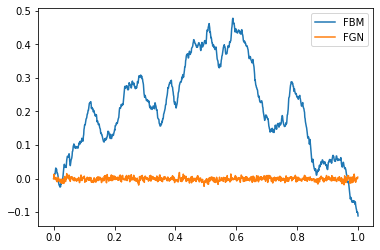

In [ ]:
plt.plot(t_values,fbm_dataset, label="FBM")
plt.plot(t_values[:-1],fgn_dataset, label="FGN")
plt.legend()

In [ ]:
#data set stands
time_series=FBM(n=1024, hurst=0.9, method='daviesharte')

# Generate a fBm realization
fbm_dataset9 = time_series.fbm()

#data set stands
time_series=FBM(n=1024, hurst=0.5, method='daviesharte')

# Generate a fBm realization
fbm_dataset5 = time_series.fbm()
#data set stands
time_series=FBM(n=1024, hurst=0.2, method='daviesharte')

# Generate a fBm realization
fbm_dataset2 = time_series.fbm()
# Get the times associated with the fBm
t_values = time_series.times()    #devided (0,1) in n parts

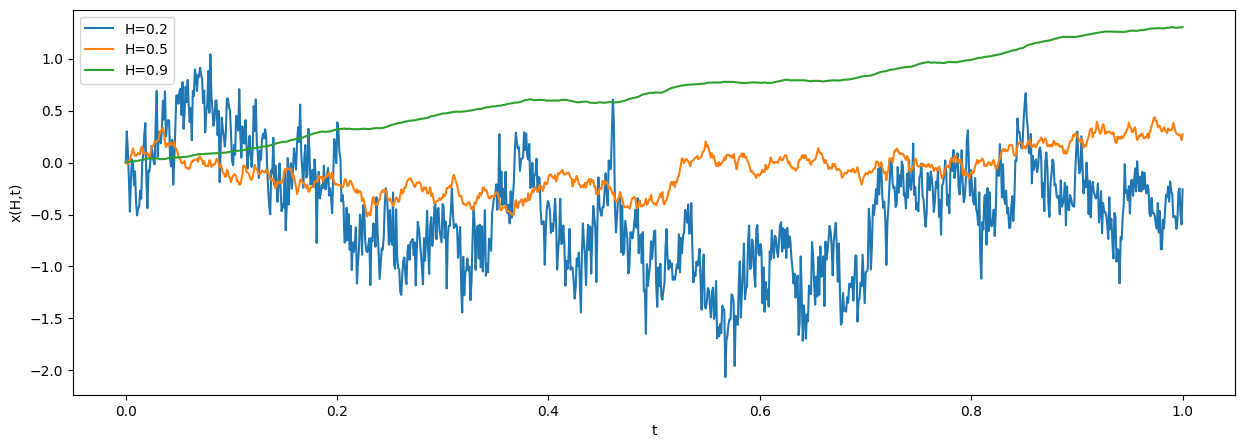

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(t_values,fbm_dataset2, label="H=0.2")
plt.plot(t_values,fbm_dataset5, label="H=0.5")
plt.plot(t_values,fbm_dataset9, label="H=0.9")
plt.xlabel("t")
plt.ylabel("x(H,t)")
plt.legend()

#Test section

In [ ]:
import numpy as np
np.arange(0.05,1,0.1)

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])

In [ ]:
#produce and save  FBM and FGN signals
hurst_exponent=np.arange(0.05,1,0.1)
all_fbm=[]
all_fgn=[]

for h in tqdm(hurst_exponent):
  all_fbm=[]
  all_fgn=[]
  for i in range(100):#number of ensemble
    #data set stands
    time_series=FBM(n=1024, hurst=h, method='daviesharte')

    # Generate a fBm realization
    fbm_dataset = time_series.fbm()
    all_fbm.append(fbm_dataset )

    # Generate a fGn realization
    fgn_dataset = time_series.fgn()
    all_fgn.append(fgn_dataset)
    # Get the times associated with the fBm
    t_values = time_series.times()    #devided (0,1) in n parts

  with open('/content/drive/MyDrive/cod/producing_fgn_fbm_signals/data/FGN'+str(round(h,2))+'.npy', 'wb') as f:
    np.save(f, np.array(all_fgn))
  with open('/content/drive/MyDrive/cod/producing_fgn_fbm_signals/data/FBM'+str(round(h,2))+'.npy', 'wb') as f:
    np.save(f, np.array(all_fbm))




100%|██████████| 10/10 [04:27<00:00, 26.73s/it]


In [ ]:
#read data
data_FBM=np.load(open('/content/drive/MyDrive/cod/data_fgn_fbm/FBM0.05.npy', 'rb'))
data_FGN=np.load(open('/content/drive/MyDrive/cod/data_fgn_fbm/FGN0.05.npy', 'rb'))